In [4]:
import pandas as pd

df = pd.read_csv("bbc-text.csv")
print("CSV file downloaded and stored in DataFrame successfully!")



CSV file downloaded and stored in DataFrame successfully!


In [5]:
# df = dataframe
print(df.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


In [6]:
# Display unique values in the 'Name' column
unique_values = df['category'].unique()
print("Unique values in the 'category' column:", unique_values)

Unique values in the 'category' column: ['tech' 'business' 'sport' 'entertainment' 'politics']


In [7]:
# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Replace column values with integers using the mapping dictionary
df['category'] = df['category'].map(mapping)

In [8]:
# Display unique values in the 'Name' column
unique_values = df['category'].unique()
print("Unique values in the 'category' column:", unique_values)

Unique values in the 'category' column: [0 1 2 3 4]


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [11]:
cls = MiniBatchKMeans(n_clusters=5)
cls.fit(features)

MiniBatchKMeans(n_clusters=5)

In [12]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([2, 3, 4, ..., 0, 3, 4])

In [13]:
# reduce the features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

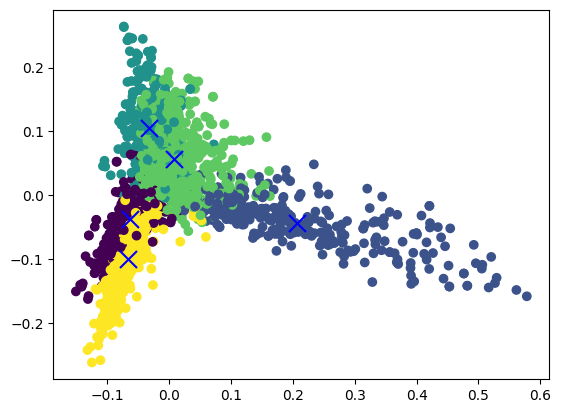

In [14]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [15]:
from sklearn.metrics import homogeneity_score
homogeneity_score(df.category, cls.predict(features))

0.7414412467205679

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.011681662670151005